**Import et connexion à la base fusionnée IEEE**

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

db_path = "bd/fusion_ieee.db"
conn = sqlite3.connect(db_path)

**Exploration rapide de la base**

In [19]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables disponibles :", tables['name'].tolist())

# Nombre de lignes par table
for table in tables['name']:
    count = pd.read_sql(f"SELECT COUNT(*) as total FROM {table}", conn)['total'][0]
    print(f"{table:<20} : {count}")

Tables disponibles : ['articles', 'sqlite_sequence', 'authors', 'labs', 'article_authors', 'author_labs', 'keywords']
articles             : 10077
sqlite_sequence      : 4
authors              : 53493
labs                 : 19578
article_authors      : 0
author_labs          : 0
keywords             : 159043


In [20]:
articles = pd.read_sql("SELECT * FROM articles", conn)
print("\nColonnes disponibles :", articles.columns.tolist())


Colonnes disponibles : ['id', 'title', 'link', 'abstract', 'doi', 'date_publication', 'publisher', 'published_in', 'print_issn', 'electronic_issn', 'source']


In [ ]:
date_cols = [c for c in articles.columns if 'date' in c.lower()]
if not date_cols:
    raise KeyError("Aucune colonne contenant 'date' trouvée dans la table articles.")
date_col = date_cols[0]
print(f"Colonne de date utilisée : {date_col}")

# Conversion et extraction de l'année
articles[date_col] = pd.to_datetime(articles[date_col], errors='coerce')
articles['year'] = articles[date_col].dt.year

Colonne de date utilisée : date_publication


**Nombre d'articles par année**

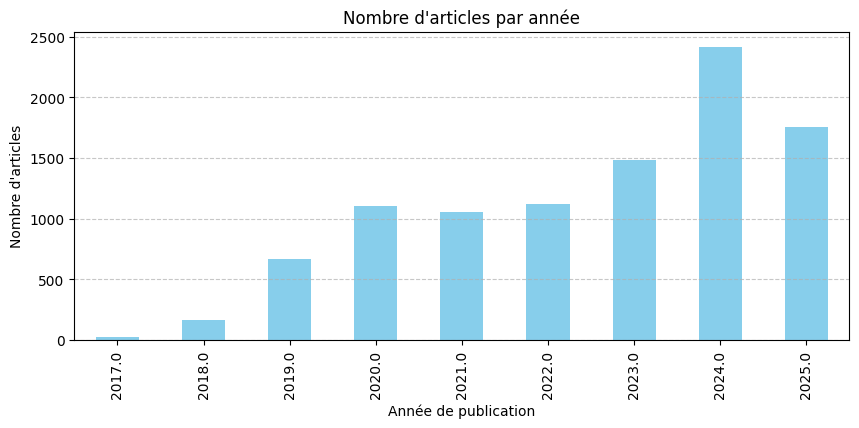

In [24]:
articles_per_year = (
    articles['year']
    .value_counts()
    .sort_index()
)

plt.figure(figsize=(10, 4))
articles_per_year.plot(kind='bar', color='skyblue')
plt.title("Nombre d'articles par année")
plt.xlabel("Année de publication")
plt.ylabel("Nombre d'articles")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Top 20 mots-clés**

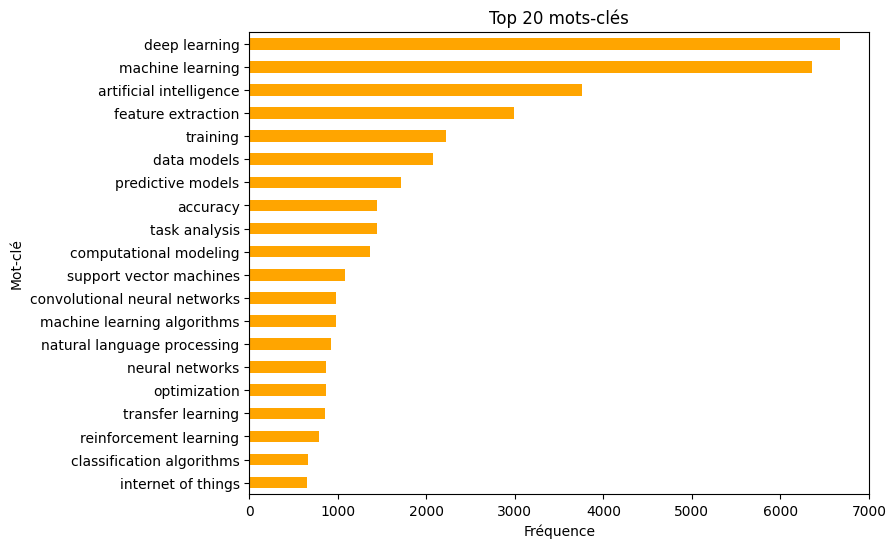

In [ ]:
keywords = pd.read_sql("SELECT * FROM keywords", conn)

if 'keyword' in keywords.columns:
    top_keywords = keywords['keyword'].value_counts().head(20)

    plt.figure(figsize=(8, 6))
    top_keywords.plot(kind='barh', color='orange')
    plt.title("Top 20 mots-clés")
    plt.xlabel("Fréquence")
    plt.ylabel("Mot-clé")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("La colonne 'keyword' n'existe pas dans la table keywords.")

**Top 20 des auteurs**

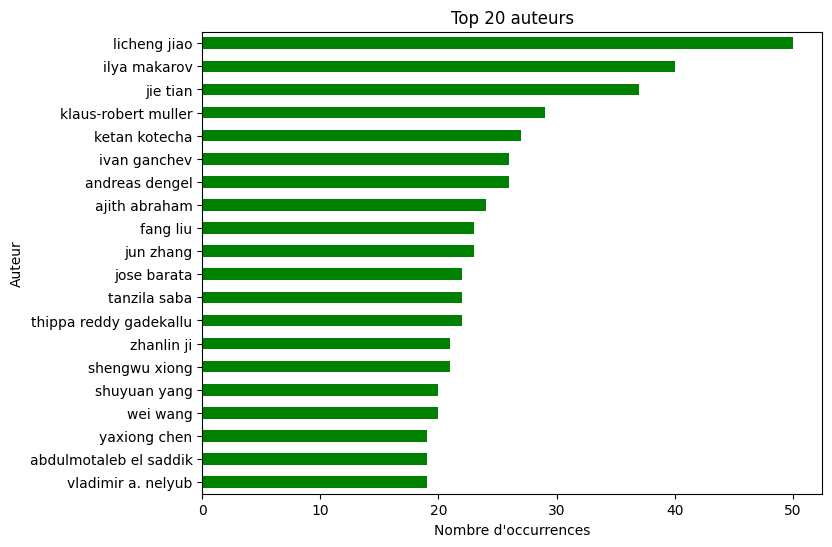

In [ ]:
authors = pd.read_sql("SELECT * FROM authors", conn)

if 'name' in authors.columns:
    top_authors = authors['name'].value_counts().head(20)

    plt.figure(figsize=(8, 6))
    top_authors.plot(kind='barh', color='green')
    plt.title("Top 20 auteurs")
    plt.xlabel("Nombre d'occurrences")
    plt.ylabel("Auteur")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("La colonne 'name' n'existe pas dans la table authors.")